In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [3]:
data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
and_table = pd.DataFrame(data,columns=['A','B','result'])

In [4]:
and_table

,A,B,result
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [6]:
def bipolar_function(x):
  if x>0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [7]:
def sigmoid_function(x):
  return (1/(1+(math.e**-x)))

In [8]:
def relu(x):
  if x>0:
    return x
  else:
    return 0

In [9]:
def summation_unit(x1,x2,w0,w1,w2):
  return (w0)+(x1*w1)+(x2*w2)

In [10]:
def summation_data(x0,x1,x2,w0,w1,w2):
  return (x0*w0)+(x1*w1)+(x2*w2)

# A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05


Converged after epoch count: 18


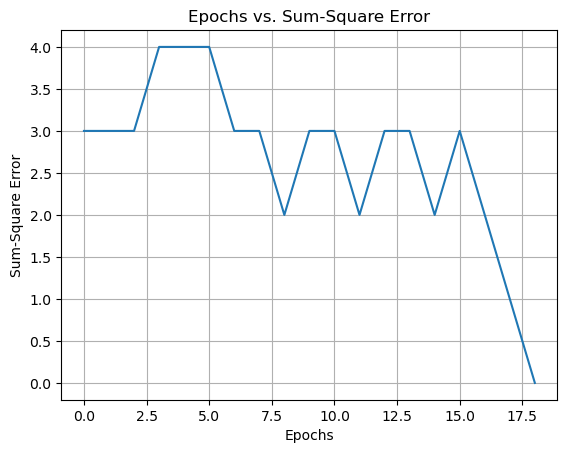

Final weights ==> w0: -1.5  w1: 1.2  w2: 0.75
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 1
Real Output: 1


In [11]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 100 epochs
while epoch_count < 100:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0
        
        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# A2. Repeat the above A1 experiment with following activation functions. Compare the iterations taken to converge against each of the activation functions. Keep the learning rate same as A1.

# Bipolar function

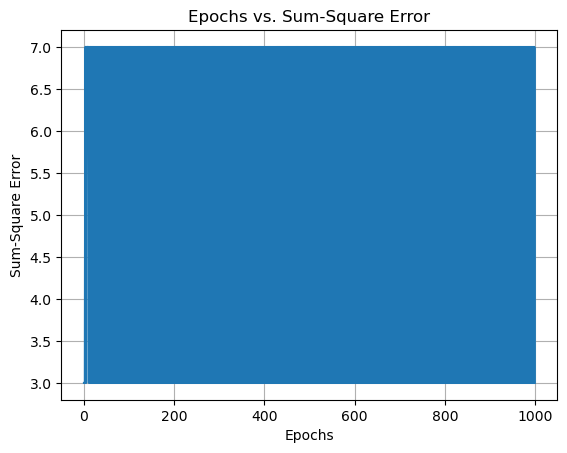

Final weights ==> w0: -1.0  w1: 1.2  w2: 1.25
Calculated Output: -1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1


In [12]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1
        
        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# Sigmoid function


Converged after epoch count: 451


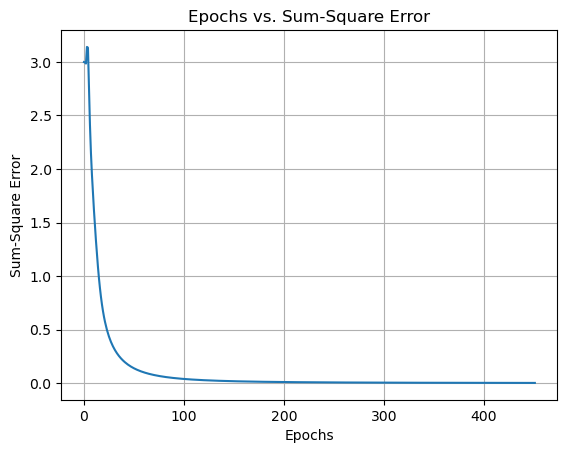

Final weights ==> w0: -11.01406446456043  w1: 7.251651917633865  w2: 7.237613596313013
Calculated Output: 1.646817326382425e-05
Real Output: 0
Calculated Output: 0.022390996364954657
Real Output: 0
Calculated Output: 0.022700359304807006
Real Output: 0
Calculated Output: 0.969973867639686
Real Output: 1


In [13]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))
        
        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# ReLU function


Converged after epoch count: 20


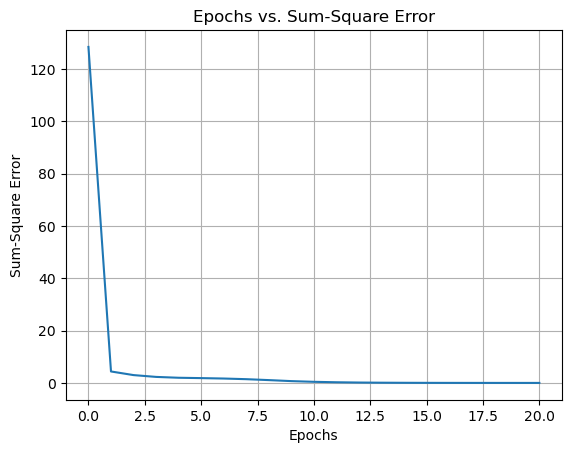

Final weights ==> w0: -0.9744791024733842  w1: 0.9999852734617888  w2: 0.9872469145057977
calculated output :  0
Real Output: 0
calculated output :  0.012767812032413506
Real Output: 0
calculated output :  0.025506170988404575
Real Output: 0
calculated output :  1.0127530854942024
Real Output: 1


In [14]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)
        
        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])


# A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for learning to converge against the learning rates.

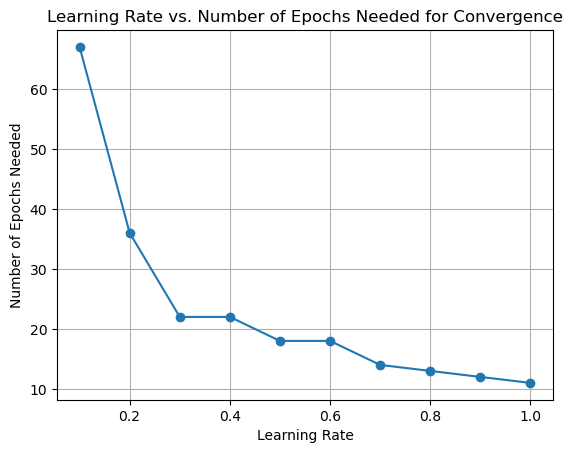

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75
    
    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []
    
    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100
    
    while epoch_count < max_epochs:
        error = 0
        
        # Loop through the AND gate data
        for index, row in and_table.iterrows():
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
            
            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0
            
            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)
            
            # Calculate the error
            e = row['result'] - predicted_output
            
            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']
            
            # Accumulate the error for this epoch
            error += e ** 2
        
        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)
        
        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            number_of_epochs_needed.append(epoch_count)
            break
        
        # Increment the epoch count
        epoch_count += 1

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs Needed')
plt.title('Learning Rate vs. Number of Epochs Needed for Convergence')
plt.grid()
plt.show()


# A4. Repeat the above exercises, A1 to A3, for XOR gate logic.

In [16]:
Xor = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_table = pd.DataFrame(Xor,columns=['A','B','result'])

In [17]:
xor_table

,A,B,result
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# A1 for xor_gate


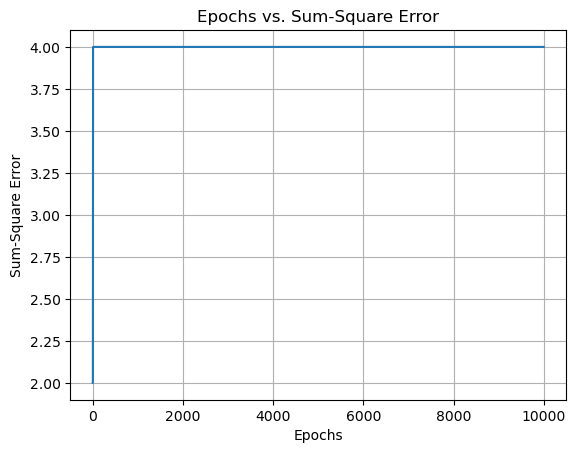

Final weights ==> w0: 0.0  w1: -0.5  w2: 0.0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1
Calculated Output: 0
Real Output: 1
Calculated Output: 0
Real Output: 0


In [18]:
# Initial weights and learning rate
w0 = 1
w1 = 1
w2 = 1
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 10,000 epochs
while epoch_count < 10000:
    error = 0
    
    # Loop through the XOR gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0
        
        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with XOR gate inputs and print calculated and real outputs
for index, row in xor_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# A2 for xor_gate

# Bi-Polar Step function

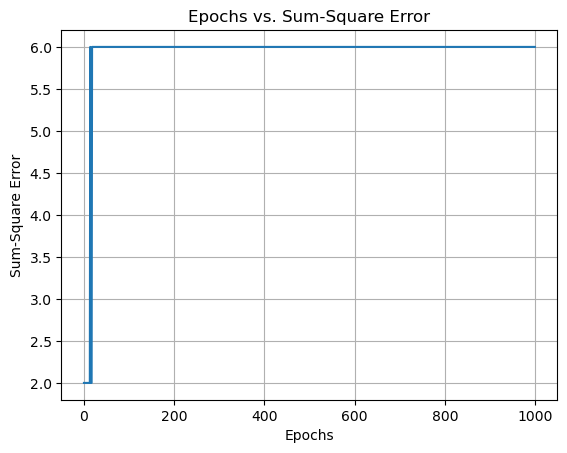

Final weights ==> w0: 1.0  w1: -0.7999999999999998  w2: -0.75
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: -1
Real Output: 1


In [19]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1
        
        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# Sigmoid function

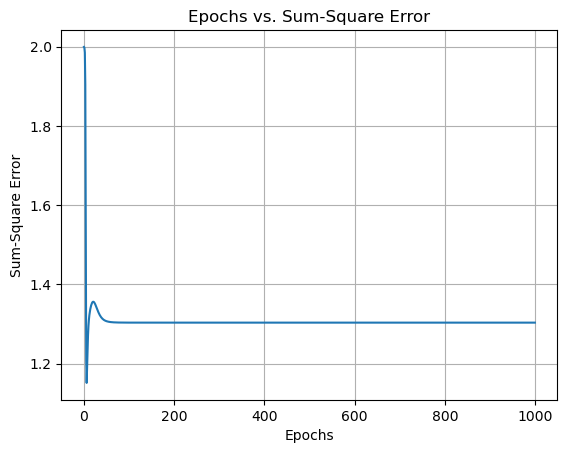

Final weights ==> w0: 0.2854396608267673  w1: -0.5708793216535337  w2: -0.28543966082676675
Calculated Output: 0.5708793216535331
Real Output: 0
Calculated Output: 0.5000000000000001
Real Output: 0
Calculated Output: 0.42912067834646717
Real Output: 0
Calculated Output: 0.3610339507358464
Real Output: 1


In [21]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the Xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))
        
        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])

# ReLU function

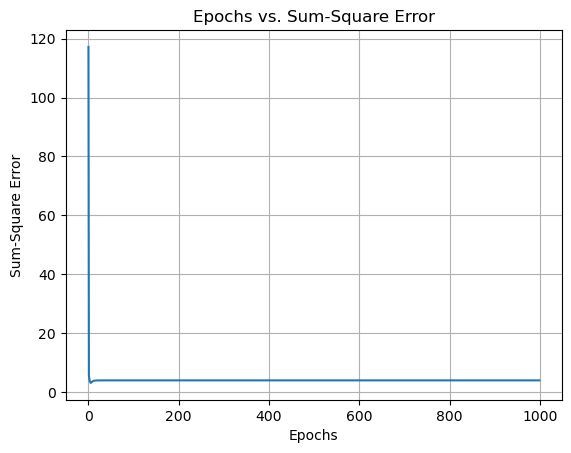

Final weights ==> w0: 0.9999999999999998  w1: -0.9999999999999998  w2: -0.49999999999999994
calculated output :  0.9999999999999998
Real Output: 0
calculated output :  0.49999999999999983
Real Output: 0
calculated output :  0
Real Output: 0
calculated output :  0
Real Output: 1


In [22]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)
        
        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])


# A3 for XOR gate

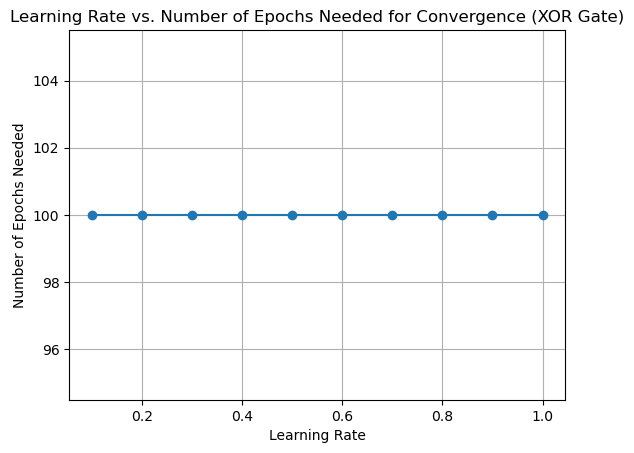

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75
    
    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []
    
    # XOR gate data
    xortable = [
        {'A': 0, 'B': 0, 'result': 0},
        {'A': 0, 'B': 1, 'result': 1},
        {'A': 1, 'B': 0, 'result': 1},
        {'A': 1, 'B': 1, 'result': 0}
    ]
    
    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100
    
    while epoch_count < max_epochs:
        error = 0
        
        # Loop through the XOR gate data
        for row in xortable:
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
            
            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0
            
            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)
            
            # Calculate the error
            e = row['result'] - predicted_output
            
            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']
            
            # Accumulate the error for this epoch
            error += e ** 2
        
        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)
        
        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            break
        
        # Increment the epoch count
        epoch_count += 1
    
    # Append the number of epochs needed to converge for this learning rate
    number_of_epochs_needed.append(epoch_count)

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs Needed')
plt.title('Learning Rate vs. Number of Epochs Needed for Convergence (XOR Gate)')
plt.grid()
plt.show()


# A5. Use customer data provided below. Build a perceptron & learn to classify the transactions as high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the weights & learning rate with your choice.

C:\Users\91993\AppData\Local\Temp\ipykernel_14112\3846628714.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Converged after epoch count: 503


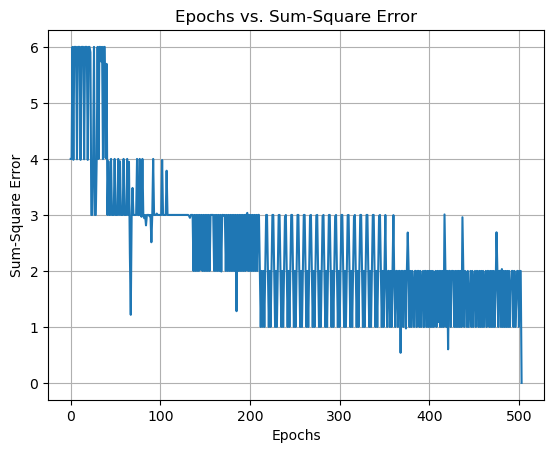

Final weights ==> w0: -3.621316356315513  w1: -53.48035135810678  w2: 8.403547545518459  w3: -21.15004489917351  w4: 4.613955460272609
   Candies  Mangoes  MilkPackets  Payment  PredictedOutput
0       17        5            3      320     1.000000e+00
1       23        2            4      150    2.261180e-265


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define customer data with features
data = pd.DataFrame({
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'MilkPackets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'HighValueTx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Map 'Yes' to 1 and 'No' to 0 for 'HighValueTx' column
data['HighValueTx'] = data['HighValueTx'].map({'Yes': 1, 'No': 0})

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and learning rate
w0 = 0.1
w1 = 0.2
w2 = 0.3
w3 = 0.4
w4 = 0.5
learning_rate = 0.01

# Initialize epoch count and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_errors = []

# Maximum number of epochs for training (in case it doesn't converge)
max_epochs = 1000

while epoch_count < max_epochs:
    error = 0
    
    for index, row in data.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']
        
        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid(weighted_sum)
        
        # Calculate the error
        e = row['HighValueTx'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['Candies']
        w2 += learning_rate * e * row['Mangoes']
        w3 += learning_rate * e * row['MilkPackets']
        w4 += learning_rate * e * row['Payment']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_errors.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2, " w3:", w3, " w4:", w4)

# Test the perceptron with sample data and print predicted outputs
sample_data = pd.DataFrame({
    'Candies': [17, 23],
    'Mangoes': [5, 2],
    'MilkPackets': [3, 4],
    'Payment': [320, 150]
})

predicted_outputs = []
for index, row in sample_data.iterrows():
    weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']
    predicted_output = sigmoid(weighted_sum)
    predicted_outputs.append(predicted_output)

sample_data['PredictedOutput'] = predicted_outputs
print(sample_data)



In [27]:
products_dataframe = pd.read_excel("C:\\Users\\91993\\Downloads\Lab Session1 Data.xlsx")

In [28]:
products_dataframe.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx?
0,C_1,20,6,2,386,Yes
1,C_2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C_4,19,1,2,110,No
4,C_5,24,4,2,280,Yes


# A6. Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse.

In [29]:
# using matrix inversion:

A = products_dataframe[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
B = products_dataframe[['Payment (Rs)']]

start = time.time()
Ain = np.linalg.pinv(A)
X = np.dot(Ain,B)
end = time.time()

print("time taken using matrix inversion : ",end-start)

time taken using matrix inversion :  0.03098464012145996


In [45]:
X

array([[ 1.],
       [55.],
       [18.]])

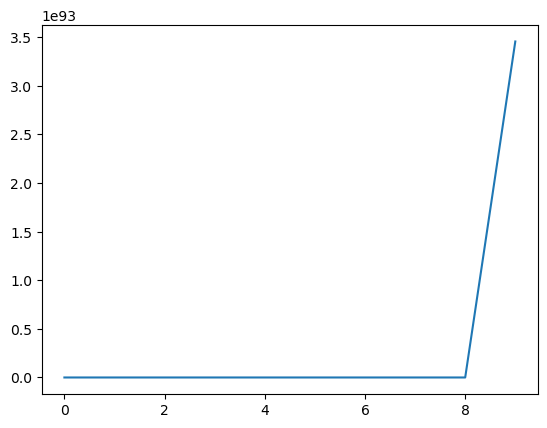

Time taken by perceptron :  0.019364356994628906
weights ==> w0 :  -5.512515357708273e+45  w1 :  -1.0146028551405357e+45  w2 :  -1.5263557771905693e+45


In [30]:
# using perceptron:
w0 = 1
w1 = 54
w2 = 18

learning_rate = 0.01

epoch_count = 0
epoches = []
sum_square_error = []

start = time.time()
while epoch_count<10:
  error = 0
  for index,row in products_dataframe.iterrows():
    if summation_data(row['Candies (#)'],row['Mangoes (Kg)'],row['Milk Packets (#)'],w0,w1,w2) != row['Payment (Rs)']:
      e = row['Payment (Rs)'] - summation_data(row['Candies (#)'],row['Mangoes (Kg)'],row['Milk Packets (#)'],w0,w1,w2)
      w0 += (learning_rate*e*row['Candies (#)'])
      w1 += (learning_rate*e*row['Mangoes (Kg)'])
      w2 += (learning_rate*e*row['Milk Packets (#)'])
      error += e**2
  epoches.append(epoch_count)
  epoch_count += 1
  sum_square_error.append(error)
  if error<0.002:
    print("epoch count : ",epoch_count)
    break

end = time.time()
plt.plot(epoches,sum_square_error)
plt.show()

print("Time taken by perceptron : ",end-start)
print("weights ==> w0 : ",w0," w1 : ",w1," w2 : ",w2)


# A7. Develop the belowNeural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the weights of the network using back-propagation algorithm to implement above provided AND gate logic. 

In [31]:
def sigmoid_function(x):
    return 1/(1+math.e**-x)

In [35]:
V = [[1,-1],[1,1]]
W =[1,1]

learning_rate = 0.05
iter = 0
error = 0  
errors = []

while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in and_table.iterrows():
    input_hidden = []
    hidden_out = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid_function(input_hidden[0]))
    hidden_out.append(sigmoid_function(input_hidden[1]))
    output = sigmoid_function(hidden_out[0]*W[0]+(hidden_out[1]*W[1]))
    ERROR = row['result'] - output
    delta1 = ((ERROR) * output *(1-output))
    delta2 = [delta1*W[0]*hidden_out[0]*(1-hidden_out[0]),delta1*W[1]*hidden_out[1]*(1-hidden_out[1])]
    for i in range(len(W)):
      W[i] += learning_rate*delta1*hidden_out[i]
    print(V)
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += ERROR**2
  errors.append(error)
  iter+=1

[[1, -1], [1, 1]]
[[1.0, -1.0], [1.0, 1.0]]
[[1.0, -1.0], [0.9987825373725181, 0.9987825373725181]]
[[0.9985963205638553, -1.0014036794361447], [0.9987825373725181, 0.9987825373725181]]
[[0.9987678639821609, -1.0009946583952294], [0.9989540807908237, 0.9991915584134333]]
[[0.9987678639821609, -1.0009946583952294], [0.9989540807908237, 0.9991915584134333]]
[[0.9987678639821609, -1.0009946583952294], [0.9977424123681012, 0.9979767046177579]]
[[0.9973773486876425, -1.0023875655322372], [0.9977424123681012, 0.9979767046177579]]
[[0.9975508698995614, -1.001973381860937], [0.9979159335800202, 0.998390888289058]]
[[0.9975508698995614, -1.001973381860937], [0.9979159335800202, 0.998390888289058]]
[[0.9975508698995614, -1.001973381860937], [0.9967103649713877, 0.9971789099232774]]
[[0.9961737435393353, -1.003355342305033], [0.9967103649713877, 0.9971789099232774]]
[[0.9963492115332947, -1.0029360297126029], [0.996885832965347, 0.9975982225157075]]
[[0.9963492115332947, -1.0029360297126029], [0.

[[0.9471961795324744, -1.311125903780164], [0.8966433399882273, 0.6572674927230632]]
[[0.9476881821772328, -1.310505957316581], [0.8966433399882273, 0.6572674927230632]]
[[0.9471268784211329, -1.3121266222953811], [0.8960820362321273, 0.6556468277442631]]
[[0.9471268784211329, -1.3121266222953811], [0.8960820362321273, 0.6556468277442631]]
[[0.9471268784211329, -1.3121266222953811], [0.8963906770703868, 0.6561600844701405]]
[[0.9476187012716116, -1.3115060590033714], [0.8963906770703868, 0.6561600844701405]]
[[0.9470575186164923, -1.3131280966568564], [0.8958294944152675, 0.6545380468166555]]
[[0.9470575186164923, -1.3131280966568564], [0.8958294944152675, 0.6545380468166555]]
[[0.9470575186164923, -1.3131280966568564], [0.8961378403009334, 0.6550519504521229]]
[[0.9475491611020085, -1.3125069164582732], [0.8961378403009334, 0.6550519504521229]]
[[0.946988100949426, -1.314130321541648], [0.8955767801483508, 0.6534285453687482]]
[[0.946988100949426, -1.314130321541648], [0.8955767801483

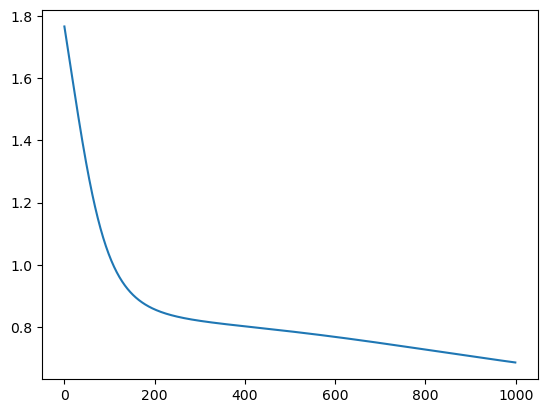

In [36]:
plt.plot(errors)
plt.show()

# A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1.

In [37]:
V = [[1,1],[1,1]]
W =[1,1]

learning_rate = 0.05
iter = 0
error = 0  
errors = []

while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in xor_table.iterrows():
    input_hidden = []
    hidden_out = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid_function(input_hidden[0]))
    hidden_out.append(sigmoid_function(input_hidden[1]))
    output = sigmoid_function(hidden_out[0]*W[0]+(hidden_out[1]*W[1]))
    ERROR = row['result'] - output
    delta1 = ((ERROR) * output *(1-output))
    delta2 = [delta1*W[0]*hidden_out[0]*(1-hidden_out[0]),delta1*W[1]*hidden_out[1]*(1-hidden_out[1])]
    for i in range(len(W)):
      W[i] += learning_rate*delta1*hidden_out[i]
    print(V)
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += ERROR**2
  errors.append(error)
  iter+=1

[[1, 1], [1, 1]]
[[1.0, 1.0], [1.0, 1.0]]
[[1.0, 1.0], [1.0002836272654412, 1.0002836272654412]]
[[1.0002832993763058, 1.0002832993763058], [1.0002836272654412, 1.0002836272654412]]
[[0.9997231185038226, 0.9997231185038226], [0.999723446392958, 0.999723446392958]]
[[0.9997231185038226, 0.9997231185038226], [0.999723446392958, 0.999723446392958]]
[[0.9997231185038226, 0.9997231185038226], [1.0000090671298345, 1.0000090671298345]]
[[1.00000840866183, 1.00000840866183], [1.0000090671298345, 1.0000090671298345]]
[[0.9994480367156706, 0.9994480367156706], [0.9994486951836752, 0.9994486951836752]]
[[0.9994480367156706, 0.9994480367156706], [0.9994486951836752, 0.9994486951836752]]
[[0.9994480367156706, 0.9994480367156706], [0.9997363014611811, 0.9997363014611811]]
[[0.9997353098205489, 0.9997353098205489], [0.9997363014611811, 0.9997363014611811]]
[[0.9991747962758075, 0.9991747962758075], [0.9991757879164397, 0.9991757879164397]]
[[0.9991747962758075, 0.9991747962758075], [0.999175787916439

[[0.9917595968924011, 0.9917595968924011], [0.9913906099916884, 0.9913906099916884]]
[[0.9918675755560704, 0.9918675755560704], [0.9913906099916884, 0.9913906099916884]]
[[0.9917968526279685, 0.9917968526279685], [0.9913198870635864, 0.9913198870635864]]
[[0.9917968526279685, 0.9917968526279685], [0.9913198870635864, 0.9913198870635864]]
[[0.9917968526279685, 0.9917968526279685], [0.9914226603542649, 0.9914226603542649]]
[[0.991904075294489, 0.991904075294489], [0.9914226603542649, 0.9914226603542649]]
[[0.9918339020257079, 0.9918339020257079], [0.9913524870854837, 0.9913524870854837]]
[[0.9918339020257079, 0.9918339020257079], [0.9913524870854837, 0.9913524870854837]]
[[0.9918339020257079, 0.9918339020257079], [0.9914545038837661, 0.9914545038837661]]
[[0.9919403772109358, 0.9919403772109358], [0.9914545038837661, 0.9914545038837661]]
[[0.9918707462131311, 0.9918707462131311], [0.9913848728859614, 0.9913848728859614]]
[[0.9918707462131311, 0.9918707462131311], [0.9913848728859614, 0.9

[[0.9992170770092353, 0.9992170770092353], [0.9970350977702364, 0.9970350977702364]]
[[0.9992170770092353, 0.9992170770092353], [0.9970766935932147, 0.9970766935932147]]
[[0.9992637902741444, 0.9992637902741444], [0.9970766935932147, 0.9970766935932147]]
[[0.9992340527429873, 0.9992340527429873], [0.9970469560620576, 0.9970469560620576]]
[[0.9992340527429873, 0.9992340527429873], [0.9970469560620576, 0.9970469560620576]]
[[0.9992340527429873, 0.9992340527429873], [0.9970885428733659, 0.9970885428733659]]
[[0.9992807569746429, 0.9992807569746429], [0.9970885428733659, 0.9970885428733659]]
[[0.99925102534413, 0.99925102534413], [0.997058811242853, 0.997058811242853]]
[[0.99925102534413, 0.99925102534413], [0.997058811242853, 0.997058811242853]]
[[0.99925102534413, 0.99925102534413], [0.9971003891708573, 0.9971003891708573]]
[[0.999297720669419, 0.999297720669419], [0.9971003891708573, 0.9971003891708573]]
[[0.9992679948620345, 0.9992679948620345], [0.9970706633634728, 0.9970706633634728]

[[1.0042579289408409, 1.0042579289408409], [1.0005499603910808, 1.0005499603910808]]
[[1.0042579289408409, 1.0042579289408409], [1.0005499603910808, 1.0005499603910808]]
[[1.0042579289408409, 1.0042579289408409], [1.0005910807087286, 1.0005910807087286]]
[[1.0043041342567913, 1.0043041342567913], [1.0005910807087286, 1.0005910807087286]]
[[1.0042748251594495, 1.0042748251594495], [1.0005617716113868, 1.0005617716113868]]
[[1.0042748251594495, 1.0042748251594495], [1.0005617716113868, 1.0005617716113868]]
[[1.0042748251594495, 1.0042748251594495], [1.0006028926580657, 1.0006028926580657]]
[[1.0043210310677702, 1.0043210310677702], [1.0006028926580657, 1.0006028926580657]]
[[1.0042917220137684, 1.0042917220137684], [1.000573583604064, 1.000573583604064]]
[[1.0042917220137684, 1.0042917220137684], [1.000573583604064, 1.000573583604064]]
[[1.0042917220137684, 1.0042917220137684], [1.000614705382425, 1.000614705382425]]
[[1.0043379285170724, 1.0043379285170724], [1.000614705382425, 1.000614

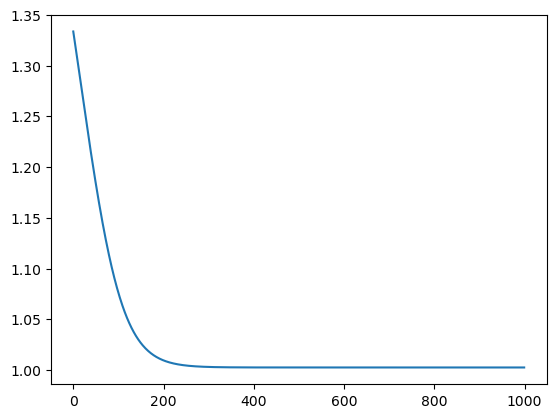

In [38]:
plt.plot(errors)
plt.show()

# A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps to [O1O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]. 

In [39]:
V = [[1,1],[1,1]]
W = [[1,1],[1,1]]

learning_rate = 0.05
iter = 0
error = 0  
errors = []
input_hidden = []
hidden_out = []
while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in and_table.iterrows():
    O_array = [not(row['result']),row['result']]
    input_hidden = []
    hidden_out = []
    output = []
    ERROR = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid_function(input_hidden[0]))
    hidden_out.append(sigmoid_function(input_hidden[1]))
    output.append(sigmoid_function(hidden_out[0]*W[0][0]+ hidden_out[1]*W[1][0]))
    output.append(sigmoid_function(hidden_out[1]*W[1][1]+ hidden_out[0]*W[0][1]))
    ERROR.append(O_array[0] - output[0])
    ERROR.append(O_array[1] - output[1])
    delta1 = [(ERROR[0]) * output[0] *(1-output[0]), (ERROR[1]) * output[1] *(1-output[1])]
    delta2 = [(delta1[0]*W[0][0] + delta1[1]*W[0][1])*hidden_out[0]*(1-hidden_out[0]),(delta1[0]*W[1][0] + delta1[1]*W[1][1])*hidden_out[1]*(1-hidden_out[1])]
    W[0][0] += learning_rate*delta1[0]*hidden_out[0] 
    W[0][1] += learning_rate*delta1[1]*hidden_out[0]
    W[1][0] += learning_rate*delta1[0]*hidden_out[1]
    W[1][1] += learning_rate*delta1[1]*hidden_out[1] 
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += (ERROR[0]**2+ERROR[1]**2)
  errors.append(error)
  iter+=1

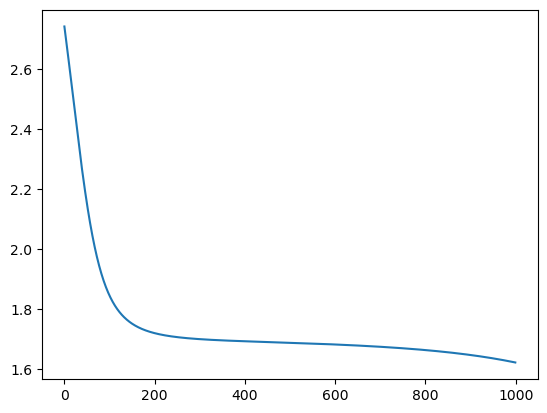

In [40]:
plt.plot(errors)
plt.show()

# A10. Learn using a MLP network from Sci-Kit manual available at https://scikit-learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.

In [41]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=2,activation='logistic',solver='sgd',learning_rate_init=0.02,max_iter=1000)

In [42]:
X_andTable = and_table[['A','B']]
Y_andTable = and_table['result']
MLP.fit(X_andTable,Y_andTable)
MLP.score(X_andTable,Y_andTable)

0.75

In [43]:
X_xorTable =xor_table[['A','B']]
Y_xorTable =xor_table['result']
MLP.fit(X_xorTable,Y_xorTable)
MLP.score(X_xorTable,Y_xorTable)

0.5